In [37]:
# Importing  necessary libraries
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [53]:
#1. Load the MNIST dataset by importing it from keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [54]:
#2. Print the shape of the datasets
print("Shape of training data:", x_train.shape)
print("Shape of testing data:", x_test.shape)

Shape of training data: (60000, 28, 28)
Shape of testing data: (10000, 28, 28)


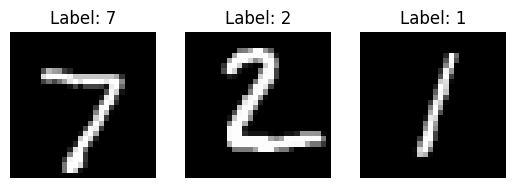

In [52]:
#3. Print the first 3 images in the test dataset
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()

In [55]:
#4. Rotate the first 3 images in the test dataset by 50%
rotation_angle = 50
datagen = ImageDataGenerator(rotation_range=rotation_angle)

# Reshape images to meet the input requirements of ImageDataGenerator
x_test_reshaped = x_test.reshape(x_test.shape + (1,))
x_test_rotated = []

# Apply rotation to each image
for i in range(3):
    img = x_test_reshaped[i]
    img_batch = img.reshape((1,) + img.shape)
    rotated_img = datagen.flow(img_batch, batch_size=1).next()[0].astype('uint8')
    x_test_rotated.append(rotated_img)

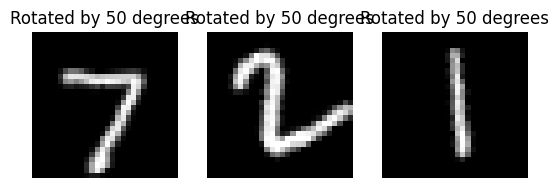

In [35]:
# 5. Print the first 3 rotated images in the test dataset
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_test_rotated[i][:, :, 0], cmap='gray')
    plt.title(f"Rotated by {rotation_angle} degrees")
    plt.axis('off')
plt.show()

In [16]:
# 6. Normalize pixel values to be between 0 and 1
import numpy as np
x_test_rotated_array = np.array(x_test_rotated)
x_test_rotated_normalized = x_test_rotated_array / 255.0
print(x_test_rotated_normalized)


[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [15]:
# 7. Flatten the images
x_test_rotated_flatten = x_test_rotated_normalized.reshape(x_test_rotated_normalized.shape[0], -1)
print(x_test_rotated_flatten)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
# 8. Convert labels to one-hot encoding
from keras.utils import to_categorical

y_test_one_hot = to_categorical(y_test[:3])  # One-hot encode the first 3 labels
print(y_test_one_hot)

[[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


In [20]:
# 9. Create and train a simple neural network
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_test_rotated_flatten, y_test_one_hot, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
1/1 [==============================] - 1s 523ms/step - loss: 2.2843 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 1.8915 - accuracy: 0.3333
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 1.5635 - accuracy: 0.6667
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 1.2865 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 1.0502 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 0.8592 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 0.7042 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 0.5825 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.4822 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 0.3969 - accuracy: 1.0000


In [21]:
# 10. Make predictions on the test dataset
predictions = model.predict(x_test_rotated_flatten)
print(predictions)

1/1 [==============================] - 0s 56ms/step
[[0.06765665 0.05238526 0.06214618 0.06273291 0.02095174 0.05294176
  0.03058529 0.65060025]
 [0.00476183 0.01909625 0.9250305  0.01451515 0.00356565 0.00797869
  0.00928245 0.0157695 ]
 [0.05766995 0.6276578  0.08003479 0.04978852 0.04183122 0.03490437
  0.06696855 0.0411448 ]]


In [23]:
# 11. Generate the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred_labels = predictions.argmax(axis=1)
conf_matrix = confusion_matrix(y_test[:3], y_pred_labels)
print(conf_matrix)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


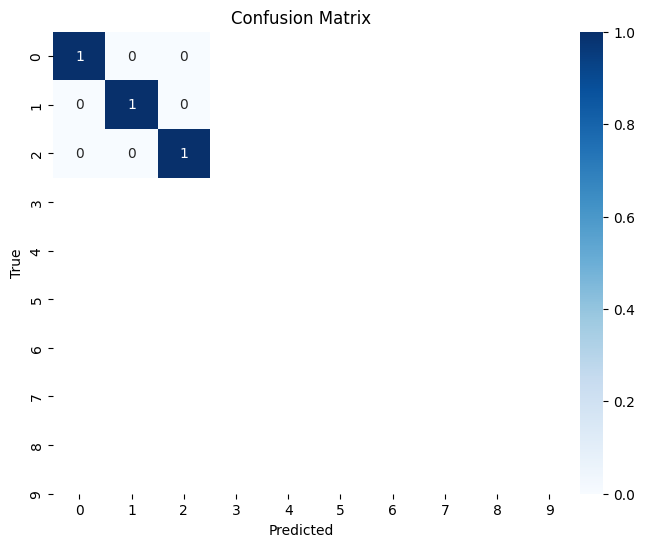

In [24]:
# 12. Plot the confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# 13. Print Classification report
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test[:3], y_pred_labels)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

